In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter
import re
import nltk

# Download necessary nltk resources if not already installed
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
df = pd.read_csv("E:\sentiment_ML_PROJECT\data\processed\cleaned_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dell\AppData\Local\Temp\ipykernel_12356\1488989861.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("E:\sentiment_ML_PROJECT\data\processed\cleaned_data.csv")


In [3]:
print(df.head())

                                        cleaned_text  sentiment
0      thats bummer shoulda got david carr third day          0
1  upset cant update facebook texting might cry r...          0
2    dived many time ball managed save rest go bound          0
3                    whole body feel itchy like fire          0
4                           behaving im mad cant see          0


In [4]:
print("Dataset Shape:", df.shape)
df.info()
print(df.describe())
print("Missing Values:", df.isnull().sum())
print("Duplicate Rows:", df.duplicated().sum())
print("Sentiment Distribution:")
print(df['sentiment'].value_counts())

Dataset Shape: (1600000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   cleaned_text  1592290 non-null  object
 1   sentiment     1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB
       sentiment
count  1600000.0
mean         0.5
std          0.5
min          0.0
25%          0.0
50%          0.5
75%          1.0
max          1.0
Missing Values: cleaned_text    7710
sentiment          0
dtype: int64
Duplicate Rows: 114457
Sentiment Distribution:
sentiment
0    800000
1    800000
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_12356\2395864251.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='coolwarm')


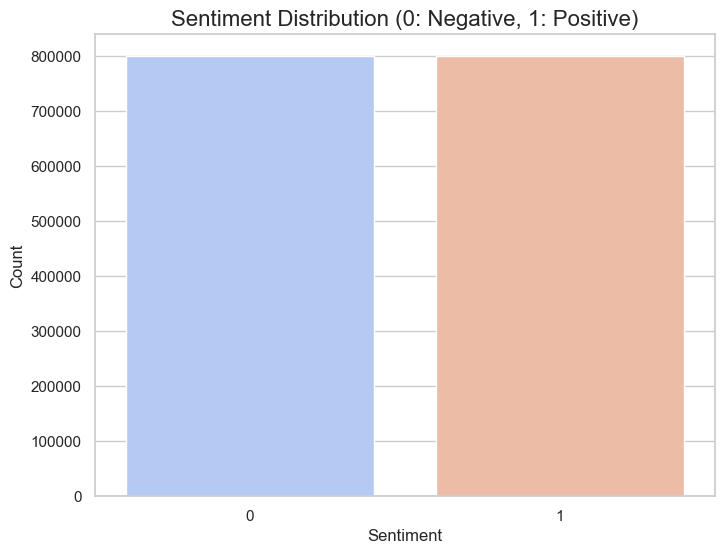

In [5]:
# Set plot style
sns.set(style="whitegrid")

# Plot the distribution of sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='coolwarm')
plt.title('Sentiment Distribution (0: Negative, 1: Positive)', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


In [6]:
import nltk
print(nltk.data.path)


['C:\\Users\\Dell/nltk_data', 'e:\\sentiment_ML_PROJECT\\sentiment_ml\\nltk_data', 'e:\\sentiment_ML_PROJECT\\sentiment_ml\\share\\nltk_data', 'e:\\sentiment_ML_PROJECT\\sentiment_ml\\lib\\nltk_data', 'C:\\Users\\Dell\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [7]:
nltk.data.path.append("E:\sentiment_ML_PROJECT\data\nltk_data")


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dell\AppData\Local\Temp\ipykernel_12356\1036638810.py:1: SyntaxWarning: invalid escape sequence '\s'
  nltk.data.path.append("E:\sentiment_ML_PROJECT\data\nltk_data")


In [8]:
print(nltk.data.find('tokenizers/punkt'))

C:\Users\Dell\AppData\Roaming\nltk_data\tokenizers\punkt


In [9]:
nltk.data.path.append("E:\sentiment_ML_PROJECT\data\nltk_data")

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dell\AppData\Local\Temp\ipykernel_12356\2719659974.py:1: SyntaxWarning: invalid escape sequence '\s'
  nltk.data.path.append("E:\sentiment_ML_PROJECT\data\nltk_data")


In [17]:
print(df[['sentiment', 'cleaned_text']].head(10))

   sentiment                                       cleaned_text
0          0      thats bummer shoulda got david carr third day
1          0  upset cant update facebook texting might cry r...
2          0    dived many time ball managed save rest go bound
3          0                    whole body feel itchy like fire
4          0                           behaving im mad cant see
5          0                                         whole crew
6          0                                           need hug
7          0  hey long time see yes rain bit bit lol im fine...
8          0                                         nope didnt
9          0                                          que muera


In [19]:
def plot_wordcloud(data, sentiment, output_path):
    # Ensure all text values are strings and handle NaN
    data['cleaned_text'] = data['cleaned_text'].fillna('').astype(str)
    
    # Concatenate all text entries for the specified sentiment
    text = " ".join(data[data['sentiment'] == sentiment]['cleaned_text'])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    
    # Plot and save the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.savefig(output_path)
    plt.close()




In [21]:
if __name__ == "__main__":
    
    plot_wordcloud(df, sentiment=1, output_path="E:/sentiment_ML_PROJECT/reports/result/positive_wordcloud.png")
    plot_wordcloud(df, sentiment=0, output_path="E:/sentiment_ML_PROJECT/reports/result/negative_wordcloud.png")


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Dell\AppData\Local\Temp\ipykernel_12356\3184685841.py:3: SyntaxWarning: invalid escape sequence '\s'
  plot_wordcloud(df, sentiment=1, output_path="E:\sentiment_ML_PROJECT/reports/result/positive_wordcloud.png")
C:\Users\Dell\AppData\Local\Temp\ipykernel_12356\3184685841.py:4: SyntaxWarning: invalid escape sequence '\s'
  plot_wordcloud(df, sentiment=0, output_path="E:\sentiment_ML_PROJECT/reports/result/negative_wordcloud.png")
